In [1]:
import os
os.sys.path.append("../../gym-duckietown")

import numpy as np
import cv2
from gym_duckietown.envs.duckietown_env import *
import matplotlib.pyplot as plt

In [2]:
env = DuckietownLF(map_name='small_loop',
                    max_steps=1500,
                    draw_curve=False,
                    draw_bbox=False,
                    domain_rand=False,
                    frame_rate=30,
                    frame_skip=1,
                    camera_width=640,
                    camera_height=480,
                    robot_speed=1.20, #MAXIMUM FORWARD ROBOT SPEED
                    accept_start_angle_deg=1,
                    full_transparency=False,
                    user_tile_start=None,
                    seed=None,
                    distortion=False,
                    randomize_maps_on_reset=False
)

/home/cfcv/miniconda3/envs/gym-duckietown/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [9]:
obs = env.reset()

In [2]:
import matplotlib.pyplot as plt

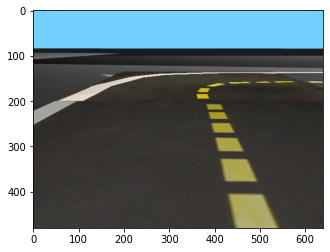

In [10]:
plt.imshow(obs)

In [86]:
img = cv2.cvtColor(cv2.imread("0.jpg"), cv2.COLOR_BGR2RGB)

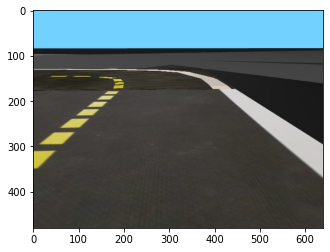

In [87]:
plt.imshow(img)

In [88]:
img.shape

(480, 640, 3)

In [89]:
left = [0,300]
right = [639, 300]
apex_left = [150, 140]
apex_right = [450, 140]

In [81]:
p_image = cv2.polylines(img, np.array([[left, apex_left, apex_right, right]], np.int32), True, (0,0,255), 10)

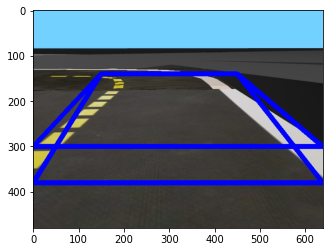

In [82]:
plt.imshow(img)

In [90]:
src = np.float32([left, apex_left, apex_right, right])
dst = np.float32([[100, 479], [100,0], [400,0], [400,479]])

In [91]:
M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(img, M, (img.shape[0], img.shape[1]), flags=cv2.INTER_AREA)

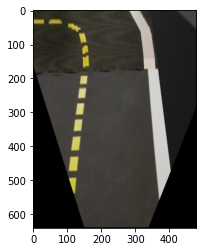

In [92]:
plt.imshow(warped)

In [ ]:
left=[150,720] #left bottom most point of trapezium
right=[1250,720] #right bottom most point of trapezium
apex_left=[590,450] # left top most point of trapezium
apex_right=[700,450] # right top most point of trapezium

src=np.float32([left,apex_left,apex_right,right]) # Source Points for Image Warp
dst= np.float32([[200 ,720], [200  ,0], [980 ,0], [980 ,720]]) # Destination Points for Image Warp


def ROI(originalImage):
    return cv2.polylines(originalImage,np.int32(np.array([[left,apex_left,apex_right,right]])),True,(0,0,255),10)

def WarpPerspective(image):
    y=image.shape[0]
    x=image.shape[1]
    M = cv2.getPerspectiveTransform(src, dst)
    return cv2.warpPerspective(image, M, (x,y), flags=cv2.INTER_LINEAR)

In [2]:
def read_images():
    images = []
    for i in range(13):
        img = cv2.cvtColor(cv2.imread(str(i)+".jpg"), cv2.COLOR_BGR2RGB)
        images.append(img)
    
    return images

In [3]:
def getTransform():
    left = [0,300]
    right = [639, 300]
    apex_left = [150, 140]
    apex_right = [450, 140]

    src = np.float32([left, apex_left, apex_right, right])
    dst = np.float32([[100, 479], [100,0], [400,0], [400,479]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    return M

In [4]:
def WarpPerspective(image, M):
    return cv2.warpPerspective(image, M, (image.shape[0], image.shape[1]), flags=cv2.INTER_AREA)

In [5]:
def toHSV(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In [6]:
def segmentYellowLane(image):
    return cv2.inRange(image, (20, 50, 100), (30, 255, 255))

In [7]:
def segmentWhiteLane(image):
    return cv2.inRange(image, (0, 0, 160), (255, 40, 255))

In [8]:
images = read_images()

In [10]:
len(images)

13

In [9]:
image = cv2.imread("test.jpg")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [10]:
image = images[0]

In [9]:
def segmentation(image):
    M = getTransform()
    warped = WarpPerspective(image, M)
    hsv = toHSV(warped)
    yellow_lane = segmentYellowLane(hsv)
    white_lane = segmentWhiteLane(hsv)
    
    return warped, M, hsv, yellow_lane, white_lane

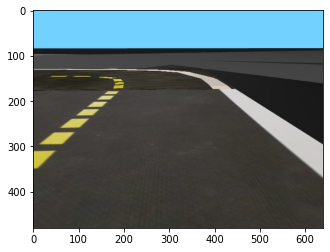

In [11]:
warped, M, hsv, yellow_lane, white_lane = segmentation(image)
plt.imshow(image)

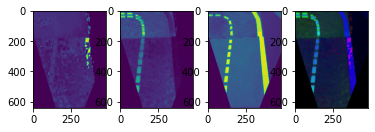

In [12]:
ax1 = plt.subplot(1,4,1)
h = np.reshape(hsv[:,:,0], (640,480,1))
ax1.imshow(h)

ax2 = plt.subplot(1,4,2)
s = np.reshape(hsv[:,:,1], (640,480,1))
ax2.imshow(s)

ax3 = plt.subplot(1,4,3)
v = np.reshape(hsv[:,:,2], (640,480,1))
ax3.imshow(v)

ax4 = plt.subplot(1,4,4)
ax4.imshow(hsv)

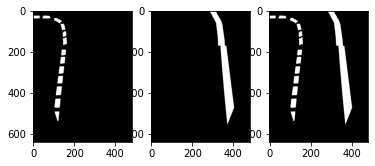

In [13]:
ax1 = plt.subplot(1,3,1)
ax1.imshow(yellow_lane, cmap='gray')

ax2 = plt.subplot(1,3,2)
ax2.imshow(white_lane, cmap='gray')

ax3 = plt.subplot(1,3,3)
ax3.imshow(cv2.bitwise_or(yellow_lane, white_lane), cmap='gray')

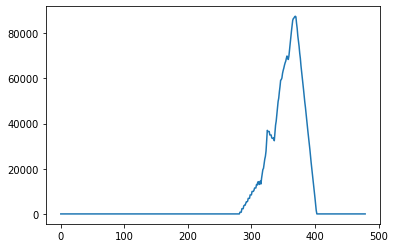

In [14]:
plt.plot(np.sum(white_lane, axis=0))

In [58]:
yellow_hist = np.sum(yellow_lane, axis=0)

In [16]:
#find pic
np.argmax(yellow_hist)

122

In [17]:
yellow_hist[122]

45900

In [22]:
yellow_lane.shape

(640, 480)

In [93]:
debug = True

w_height = 30
w_width = 40

min_pix = 100

yellow_lane_dict = find_lane(yellow_lane, w_height, w_width, min_pix, debug)
white_lane_dict = find_lane(white_lane, w_height, w_width, min_pix, debug)

{'w_centroids': [[122, 625], [122, 595], [122, 565], [122, 535], [119, 527]], 'found': True, 'w_center': (119, 527)}
False 30
{'w_centroids': [[369, 625], [369, 595], [369, 565], [369, 535], [373, 531]], 'found': True, 'w_center': (373, 531)}
False 30


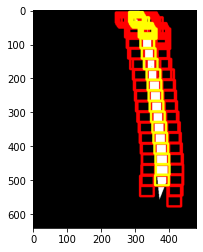

In [94]:
plt.imshow(white_lane_dict["debug_images"][1])

In [95]:
def find_lane(binary_image, w_height, w_width, min_pix, debug=False):
    
    dict_find_lanes = {}
    
    binary_hist = np.sum(binary_image, axis=0)
    nonzero = binary_image.nonzero()
    nonzero_y = np.array(nonzero[0])
    nonzero_x = np.array(nonzero[1])

    w_x = int(np.argmax(binary_hist))
    w_y = int(binary_image.shape[0] - w_height/2)

    #find first window
    dict_first_window = find_first_window(w_x, w_y, w_height, w_width, nonzero_x, nonzero_y, debug)

    if dict_first_window["found"]:
        dict_remaining_windows = find_remaining_windows(dict_first_window["w_center"], w_height, w_width, nonzero_x, nonzero_y, debug)
        
        dict_find_lanes["windows"] = [dict_first_window["w_center"]] + dict_remaining_windows["chosen_windows"]
        dict_find_lanes["found"] = True

        if debug:
            initial_window_img = debug_initial_window(binary_image, dict_first_window["w_centroids"], w_width, w_height)
            remaining_windows_img = debug_remaining_windows(binary_image, dict_remaining_windows, w_height, w_width)
            
            dict_find_lanes["debug_images"] = [initial_window_img, remaining_windows_img]
    else:
        print("Lane didn't found")
        dict_find_lanes["found"] = False
        
    return dict_find_lanes

False 30


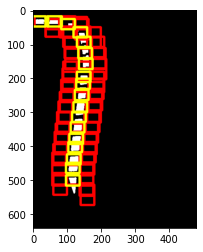

In [67]:
dict_remaining_windows = find_remaining_windows(dict_first_window["w_center"], w_height, w_width, nonzero_x, nonzero_y, debug)
remaining_windows_img = debug_remaining_windows(yellow_lane, dict_remaining_windows, w_height, w_width)
plt.imshow(remaining_windows_img)

In [17]:
def debug_remaining_windows(img, dict_remaining_windows, w_height, w_width):
    remaining_windows_img = np.dstack((img, img, img))

    for window in dict_remaining_windows["search_windows"]:
        w_x_high = int(window[0] - w_width/2)
        w_y_high = int(window[1] - w_height/2)

        w_x_low = int(window[0] + w_width/2)
        w_y_low = int(window[1] + w_height/2)

        remaining_windows_img = cv2.rectangle(remaining_windows_img, (w_x_high, w_y_high), (w_x_low, w_y_low), (255,0,0), 5)

    for window in dict_remaining_windows["chosen_windows"]:
        w_x_high = int(window[0] - w_width/2)
        w_y_high = int(window[1] - w_height/2)

        w_x_low = int(window[0] + w_width/2)
        w_y_low = int(window[1] + w_height/2)

        remaining_windows_img = cv2.rectangle(remaining_windows_img, (w_x_high, w_y_high), (w_x_low, w_y_low), (255,255,0), 5)

    return remaining_windows_img   

In [65]:
def find_remaining_windows(w_center, w_height, w_width, nonzero_x, nonzero_y, debug=False):
    offsets = [(-w_width, 0), (-w_width, -w_height), (0, -w_height), (w_width, w_height), (w_width, 0)] #left, upper-left, above, uper right, right
    
    dict_remaining_w = {}
    
    if debug:
        dict_remaining_w["search_windows"] = []
    dict_remaining_w["chosen_windows"] = []
    
    current_x = w_center[0]
    current_y = w_center[1]
    
    done = False
    count = 0
    while not done and (count < 30):
        best_offset_index = -1
        best_offset_p = -1
        best_inside_indexes = None

        for i, off in enumerate(offsets):
            w_x = current_x + off[0]
            w_y = current_y + off[1]

            w_x_high = int(w_x - w_width/2)
            w_y_high = int(w_y - w_height/2)

            w_x_low = int(w_x + w_width/2)
            w_y_low = int(w_y + w_height/2)

            if w_x_high < 0 or w_x_low > 480 or w_y_high < 0 or w_y_low > 640:
                pixels_inside = 0
                inside_window = None
            else:
                inside_window = ( (nonzero_y >= w_y_high) & (nonzero_y < w_y_low) & 
            (nonzero_x >= w_x_high) &  (nonzero_x <= w_x_low)).nonzero()[0]
                pixels_inside = len(inside_window)

                if debug:
                    dict_remaining_w["search_windows"].append((w_x,w_y))
            
            if pixels_inside > best_offset_p:
                best_offset_index = i
                best_offset_p = pixels_inside
                best_inside_indexes = inside_window

        if best_offset_p <= 0:
            done = True
        else:
            current_x = int(np.mean(nonzero_x[best_inside_indexes]))
            current_y = int(np.mean(nonzero_y[best_inside_indexes]))
            if len(dict_remaining_w["chosen_windows"]) > 0 and current_x == dict_remaining_w["chosen_windows"][-1][0] and current_y == dict_remaining_w["chosen_windows"][-1][1]:
                done = True
            #print(current_x, current_y)
            dict_remaining_w["chosen_windows"].append((current_x,current_y))
        
        count += 1
    print(done, count)
    return dict_remaining_w

In [19]:
def find_first_window(w_x, w_y, w_height, w_width, nonzero_x, nonzero_y, debug=False):
    
    dict_first_window = {}
    if debug:
        dict_first_window["w_centroids"] = []
    
    done = False
    dict_first_window["found"] = False
    
    while not done:
        if debug:
            dict_first_window["w_centroids"].append([w_x,w_y])

        w_x_high = int(w_x - w_width/2)
        w_y_high = int(w_y - w_height/2)

        w_x_low = int(w_x + w_width/2)
        w_y_low = int(w_y + w_height/2)

        if w_x_high < 0 or w_x_low > 480 or w_y_high < 0 or w_y_low > 640:
            done = True
            continue
        
        inside_window = ( (nonzero_y >= w_y_high) & (nonzero_y < w_y_low) & 
            (nonzero_x >= w_x_high) &  (nonzero_x <= w_x_low)).nonzero()[0]

        if len(inside_window) > min_pix:
            w_x = int(np.mean(nonzero_x[inside_window]))
            w_y = int(np.mean(nonzero_y[inside_window]))
            
            if debug:
                dict_first_window["w_centroids"].append([w_x, w_y])

            done = True
            dict_first_window["found"] = True
            dict_first_window["w_center"] = (w_x, w_y)
        else:
            w_y = int(w_y - w_height)
            
    return dict_first_window

In [20]:
def debug_initial_window(image, initial_centroids, w_width, w_height):
    initial_window_img = np.dstack((image, image, image))

    for window in initial_centroids[:-1]:
        w_x_high = int(window[0] - w_width/2)
        w_y_high = int(window[1] - w_height/2)

        w_x_low = int(window[0] + w_width/2)
        w_y_low = int(window[1] + w_height/2)

        initial_window_img = cv2.rectangle(initial_window_img, (w_x_high, w_y_high), (w_x_low, w_y_low), (255,0,0), 5)

    window = initial_centroids[-1]
    w_x_high = int(window[0] - w_width/2)
    w_y_high = int(window[1] - w_height/2)

    w_x_low = int(window[0] + w_width/2)
    w_y_low = int(window[1] + w_height/2)

    initial_window_img = cv2.rectangle(initial_window_img, (w_x_high, w_y_high), (w_x_low, w_y_low), (255,255,0), 5)
    
    return initial_window_img

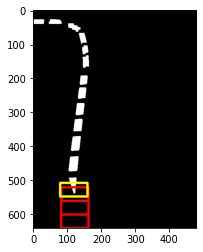

In [27]:
plt.imshow(initial_window_img)

In [37]:
l = [1,2,3,4,5]

In [39]:
l[:-1]

[1, 2, 3, 4]

In [28]:
print(nonzero_x[inside_window])
print(int(np.mean(nonzero_x[inside_window])))
print(nonzero_y[inside_window])
print(int(np.mean(nonzero_y[inside_window])))

[113 114 115 116 117 118 119 120 121 122 123 124 113 114 115 116 117 118
 119 120 121 122 123 124 114 115 116 117 118 119 120 121 122 123 124 114
 115 116 117 118 119 120 121 122 123 124 114 115 116 117 118 119 120 121
 122 123 124 115 116 117 118 119 120 121 122 123 124 115 116 117 118 119
 120 121 122 123 124 115 116 117 118 119 120 121 122 123 116 117 118 119
 120 121 122 123 116 117 118 119 120 121 122 123 116 117 118 119 120 121
 122 123 117 118 119 120 121 122 123 117 118 119 120 121 122 123 117 118
 119 120 121 122 123 118 119 120 121 122 123 118 119 120 121 122 123 118
 119 120 121 122 119 120 121 122 119 120 121]
119
[520 520 520 520 520 520 520 520 520 520 520 520 521 521 521 521 521 521
 521 521 521 521 521 521 522 522 522 522 522 522 522 522 522 522 522 523
 523 523 523 523 523 523 523 523 523 523 524 524 524 524 524 524 524 524
 524 524 524 525 525 525 525 525 525 525 525 525 525 526 526 526 526 526
 526 526 526 526 526 527 527 527 527 527 527 527 527 527 528 528 528 528
 

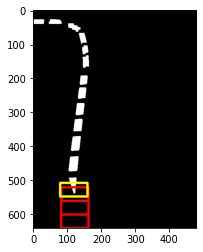

In [33]:
plt.imshow(out_img, cmap='gray')

In [72]:
nonzero[1][0]

0